## Problem Identification:-
### The challenge involves constructing a Random Forest classifier for hierarchical-based classification of customers' countries using features from an online retail dataset. The objective is to accurately predict the country of a customer based on transaction attributes, framing it as a supervised classification problem. The chosen model, Random Forest, will be trained and evaluated, with a focus on exploring the dataset, preprocessing, and tuning hyperparameters for optimal performance. The success of the model will be assessed through metrics such as accuracy, precision, recall, and F1 score. Ultimately, the goal is to deploy the trained model to make predictions on sample data points, ensuring its practical applicability in assigning customers to their respective countries.

---

## Importing Liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

## Loading The Dataset

In [2]:
df=pd.read_excel("C://Users//HP//Documents//Final Project DA//Online Retail.xlsx")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### About the Dataset:-
#### This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.
#### Variable Information:-
#### 1.InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
#### 2. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
#### 3.Description: Product (item) name. Nominal.
#### 4. Quantity: The quantities of each product (item) per transaction. Numeric.	
#### 5. InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
#### 6. UnitPrice: Unit price. Numeric, Product price per unit in sterling.
#### 7. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
#### 8. Country: Country name. Nominal, the name of the country where each customer resides. 



## Data Exploration

In [4]:
#Checking Datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
print("Number of Rows: ",df.shape[0])
print("Number of Columns: ",df.shape[1])

Number of Rows:  541909
Number of Columns:  8


In [6]:
#Finding Null Values

df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

#### Here we can see that the column CustomerID has lot of Null values and the attribute CustomerID won't be of any significance in building of the supervised Machine Learning model therefore, we can drop the column CoustomerID

In [7]:
#Droping Column CustomerID

df.drop(columns=['CustomerID'],inplace=True)

In [8]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom


In [9]:
#Droping Duplicate Values

df.drop_duplicates(inplace=True)

In [10]:
#Checking the number of rows and columns after droping duplicate values

print("Number of Rows: ",df.shape[0])
print("Number of Columns: ",df.shape[1])

Number of Rows:  536641
Number of Columns:  7


#### Since, the number of rows in the dataset is 536641 and the number of Null values in Description column is 1454 which is around 0.27 % of the number of records so we can easily remove these values as 0.27 % is a very small and won't hamper in building and training of our model.

In [11]:
#Droping Null Values

df.dropna(subset=['Description'], inplace=True)

In [12]:
#Checking if removal of Null values was successful

df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [13]:
print("Number of Rows: ",df.shape[0])
print("Number of Columns: ",df.shape[1])

Number of Rows:  535187
Number of Columns:  7


In [14]:
df.describe()

,Quantity,UnitPrice
count,535187.000000,535187.000000
mean,9.671593,4.645242
std,219.059056,97.364810
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


#### From the description we can see that negative values are present in "Quantity"and "UnitPrice" columns. Therefore, we can say that there is a prevalence of negative unit pricing, which is linked to bad debt adjustment. It's preferable to discard those records as these negative values might hamper in building and training the model and henceforth the predictions might also go wrong.

In [15]:
#Fetching the negative values

df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,United Kingdom


In [16]:
#Droping the negative records

df.drop(index=[299983,299984],inplace=True)
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom


In [17]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,United Kingdom
...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,United Kingdom


#### As we can see, some of the quantities are negative, which might mean that some things are being returned. Therefore, the return orders will cancel out the purchased items.

In [18]:
#Getting a description of the dataset after droping the nagative records

df.describe()

,Quantity,UnitPrice
count,535185.000000,535185.000000
mean,9.671626,4.686598
std,219.059465,94.985568
min,-80995.000000,0.000000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


### Feature Engineering (Creating new columns)

In [19]:
# Creating a column named as Revenue

df['Revenue']=df['Quantity']*df['UnitPrice']
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34


In [20]:
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Day'] = df['InvoiceDate'].dt.day_name()
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Revenue,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,December,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,December,Wednesday


In [21]:
#Dropping columns that will not be of much help in training tha data

df.drop(columns=['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate',],inplace=True,axis=1)
df.head(2)

,Quantity,UnitPrice,Country,Revenue,Month,Day
0,6,2.55,United Kingdom,15.30,December,Wednesday
1,6,3.39,United Kingdom,20.34,December,Wednesday


In [22]:
#correlation matrix

correlation_columns = ['Quantity', 'UnitPrice', 'Revenue']
correlation_matrix = df[correlation_columns].corr()
print(correlation_matrix)

           Quantity  UnitPrice   Revenue
Quantity   1.000000  -0.001303  0.889597
UnitPrice -0.001303   1.000000 -0.179049
Revenue    0.889597  -0.179049  1.000000


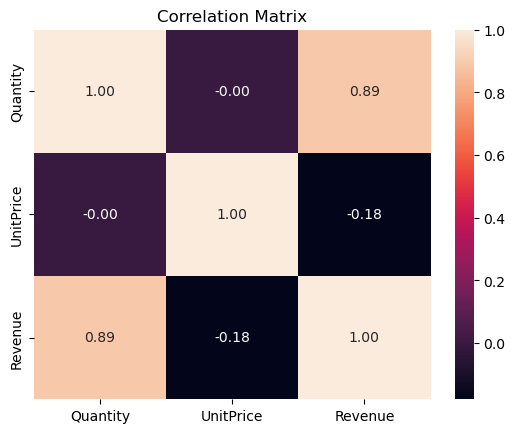

In [23]:
sns.heatmap(correlation_matrix, annot=True, linecolor='white',robust=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [24]:
df.head(2)

,Quantity,UnitPrice,Country,Revenue,Month,Day
0,6,2.55,United Kingdom,15.30,December,Wednesday
1,6,3.39,United Kingdom,20.34,December,Wednesday


In [25]:
#Popout target to separate predictors and target

y = df.pop('Country')
x = df

In [26]:
#Label Encoding Target Variable

print("Unencoded target column is:",
y)

le = LabelEncoder()
le.fit(y)
y = le.fit_transform(y)
print("Encoded y is:", y)

Unencoded target column is: 0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
541904            France
541905            France
541906            France
541907            France
541908            France
Name: Country, Length: 535185, dtype: object
Encoded y is: [36 36 36 ... 13 13 13]


In [27]:
#Spliting the Dataset

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1, stratify=y)

In [28]:
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore")

#Identify numeric and categorical features
numeric_features = x.select_dtypes(include=['float', 'int']).columns
categorical_features = x.select_dtypes(include=['object']).columns

#Feature Scaling
scaler = StandardScaler()

#Pipeline
Pipe1 = Pipeline([
    ('Feature Scaling', scaler)
])
Pipe2 = Pipeline([
    ('OneHot Encoding', onehot(handle_unknown="ignore"))
])

# Create a column transformer
ct_transformer = ColumnTransformer(
    transformers=[
        ('num', Pipe1, numeric_features),
        ('cat', Pipe2, categorical_features)
    ]) 

#Pipeline
clf1= RandomForestClassifier(n_estimators=50)
pipeline = Pipeline(steps=[
    ("preprocessor", ct_transformer),
    ("classifier", clf1)
])  

In [29]:
# Fitting the pipeline on the training data

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Feature '
                                                                   'Scaling',
                                                                   StandardScaler())]),
                                                  Index(['Quantity', 'UnitPrice', 'Revenue'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('OneHot '
                                                                   'Encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Month', 'Day'], dtype='object'))])),
                ('classifier', RandomForestClassifier(n_estimators=50))])

In [30]:
#Predictions

y_pred = pipeline.predict(X_test)

In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred)

array([[    99,      0,      0, ...,      0,    251,      0],
       [     0,      2,      0, ...,      0,    115,      0],
       [     0,      0,      0, ...,      0,      6,      0],
       ...,
       [     0,      0,      0, ...,      1,     18,      0],
       [    66,      3,      1, ...,      0, 145400,     12],
       [     0,      0,      0, ...,      0,    123,      9]], dtype=int64)

In [32]:
A=round(metrics.accuracy_score(y_test, y_pred),3)
P=round(precision_score(y_test, y_pred, average='weighted'),3)
R=round(recall_score(y_test, y_pred, average='weighted'),3)
f1=round(f1_score(y_test, y_pred, average='weighted'),3)

print("Accuracy Score: ",A)
print("Precision Score: ",P)
print("Recall Score: ",R)
print("f1 Score: ",f1)

Accuracy Score:  0.912
Precision Score:  0.87
Recall Score:  0.912
f1 Score:  0.882


### From the above Accuracy and f1 Score we can say that the model is a good fit an d an accurate model and most of the data points predicted by the model are correct.

---

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.26      0.35       377
           1       0.18      0.02      0.03       120
           2       0.00      0.00      0.00         6
           3       0.31      0.03      0.05       621
           4       0.25      0.10      0.14        10
           5       0.00      0.00      0.00        45
           6       0.28      0.03      0.06       227
           7       0.12      0.01      0.02       183
           8       0.00      0.00      0.00         9
           9       0.38      0.08      0.13       117
          10       0.35      0.06      0.11      2455
          11       0.25      0.06      0.09        18
          12       0.23      0.05      0.09       209
          13       0.30      0.04      0.07      2562
          14       0.34      0.06      0.10      2844
          15       0.25      0.07      0.11        44
          16       0.31      0.09      0.14        85
          17       0.14    

In [34]:
sample_data= pd.read_excel("C://Users//HP//Documents//Final Project DA//Sample Data.xlsx")

In [35]:
sample_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,1,123,RECIPE BOX WITH METAL HEART,10,2010-12-01 08:45:00,0.80,5461
1,2,897,BATH BUILDING BLOCK WORD,50,2010-12-01 08:45:00,5.00,597236
2,565967,21989,PACK OF 20 SKULL PAPER NAPKINS,24,2011-09-08 11:27:00,0.85,14646


In [36]:
sample_data['Revenue']=sample_data['Quantity']*sample_data['UnitPrice']
sample_data['Month'] = sample_data['InvoiceDate'].dt.month_name()
sample_data['Day'] = sample_data['InvoiceDate'].dt.day_name()
sample_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue,Month,Day
0,1,123,RECIPE BOX WITH METAL HEART,10,2010-12-01 08:45:00,0.80,5461,8.0,December,Wednesday
1,2,897,BATH BUILDING BLOCK WORD,50,2010-12-01 08:45:00,5.00,597236,250.0,December,Wednesday
2,565967,21989,PACK OF 20 SKULL PAPER NAPKINS,24,2011-09-08 11:27:00,0.85,14646,20.4,September,Thursday


In [39]:
sample_pred=pipeline.predict(sample_data)
print("The prediction for the sample data set is:", sample_pred)

The prediction for the sample data set is: [36 36 36]


### Here 36 is encoded as "United Kingdom" therefore, according to the above prediction all the three customers belongs to United Kingdom